In [1]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pymongo import MongoClient

In [3]:
client = MongoClient()

In [4]:
db=client['la_traffic']

In [5]:
tickets=db['la_traffic_citations']

In [6]:
tickets.find_one()

{'_id': ObjectId('5ecbea08a1360440c4dcd9d3'),
 'Ticket number': '1103341116',
 'Issue Date': '2015-12-21T00:00:00.000',
 'Issue time': '1251',
 'Meter Id': '',
 'Marked Time': '',
 'RP State Plate': 'CA',
 'Plate Expiry Date': '200304',
 'VIN': '',
 'Make': 'HOND',
 'Body Style': 'PA',
 'Color': 'GY',
 'Location': '13147 WELBY WAY',
 'Route': '01521',
 'Agency': '1',
 'Violation code': '4000A1',
 'Violation Description': 'NO EVIDENCE OF REG',
 'Fine amount': '50',
 'Latitude': '99999',
 'Longitude': '99999',
 'Agency Description': '',
 'Color Description': '',
 'Body Style Description': ''}

In [10]:
co_tickets = tickets.find({'RP State Plate':{'$eq': 'FL'}}).limit(100)

In [11]:
co_tickets[0]

{'_id': ObjectId('5ecbea08a1360440c4dcd9e7'),
 'Ticket number': '1107780822',
 'Issue Date': '2015-12-22T00:00:00.000',
 'Issue time': '1105',
 'Meter Id': '',
 'Marked Time': '',
 'RP State Plate': 'FL',
 'Plate Expiry Date': '201611',
 'VIN': '',
 'Make': 'FORD',
 'Body Style': 'PA',
 'Color': 'WH',
 'Location': '',
 'Route': '2A1',
 'Agency': '1',
 'Violation code': '8069B',
 'Violation Description': 'NO PARKING',
 'Fine amount': '73',
 'Latitude': '99999',
 'Longitude': '99999',
 'Agency Description': '',
 'Color Description': '',
 'Body Style Description': ''}

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.io.json.json_normalize(co_tickets)

In [13]:
df.head()

,_id,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,...,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Agency Description,Color Description,Body Style Description
0,5ecbea08a1360440c4dcddb8,4272435510,2015-12-30T00:00:00.000,1253,BF673,,CO,201706,,CHRY,...,00474,54,88.03A,OUTSIDE LINES/METER,58,6449916.6,1852253.7,,,
1,5ecbea09a1360440c4dcde9e,4272603473,2015-12-30T00:00:00.000,301,,,CO,201607,,HYUN,...,00107,55,80.56E4+,RED ZONE,93,6475587.7,1840381,,,
2,5ecbea09a1360440c4dcdfc8,4272779803,2015-12-30T00:00:00.000,725,,,CO,201608,,FORD,...,00442,54,80.70,NO STOPPING/ANTI-GRI,163,6469130.6,1844981.4,,,
3,5ecbea09a1360440c4dce084,4272895266,2015-12-30T00:00:00.000,1809,,,CO,201605,,JEEP,...,00402,54,80.69B,NO PARKING,73,6460327.1,1859514.2,,,
4,5ecbea09a1360440c4dce0d6,4273857921,2016-01-03T00:00:00.000,1152,,,CO,,,DODG,...,00201,51,80.69B,NO PARKING,73,99999,99999,,,


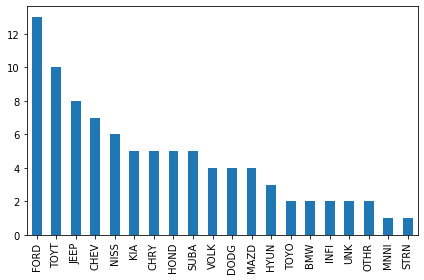

In [14]:
ax = df['Make'].value_counts()[:20].plot.bar()
plt.tight_layout()

In [15]:
fig = ax.get_figure()
fig.savefig('barplot.jpg')

In [16]:
ca = tickets.find({'RP State Plate':{'$eq': 'CA'}}).limit(100)

In [17]:
ca[0]

{'_id': ObjectId('5ecbea08a1360440c4dcd9d3'),
 'Ticket number': '1103341116',
 'Issue Date': '2015-12-21T00:00:00.000',
 'Issue time': '1251',
 'Meter Id': '',
 'Marked Time': '',
 'RP State Plate': 'CA',
 'Plate Expiry Date': '200304',
 'VIN': '',
 'Make': 'HOND',
 'Body Style': 'PA',
 'Color': 'GY',
 'Location': '13147 WELBY WAY',
 'Route': '01521',
 'Agency': '1',
 'Violation code': '4000A1',
 'Violation Description': 'NO EVIDENCE OF REG',
 'Fine amount': '50',
 'Latitude': '99999',
 'Longitude': '99999',
 'Agency Description': '',
 'Color Description': '',
 'Body Style Description': ''}

In [23]:
no_ca = tickets.find({'RP State Plate':{'$ne': 'CA'}})

In [24]:
no_ca[0]

{'_id': ObjectId('5ecbea08a1360440c4dcd9e7'),
 'Ticket number': '1107780822',
 'Issue Date': '2015-12-22T00:00:00.000',
 'Issue time': '1105',
 'Meter Id': '',
 'Marked Time': '',
 'RP State Plate': 'FL',
 'Plate Expiry Date': '201611',
 'VIN': '',
 'Make': 'FORD',
 'Body Style': 'PA',
 'Color': 'WH',
 'Location': '',
 'Route': '2A1',
 'Agency': '1',
 'Violation code': '8069B',
 'Violation Description': 'NO PARKING',
 'Fine amount': '73',
 'Latitude': '99999',
 'Longitude': '99999',
 'Agency Description': '',
 'Color Description': '',
 'Body Style Description': ''}

In [25]:
df2 = pd.io.json.json_normalize(no_ca)

In [26]:
df2.head()

,_id,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,...,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Agency Description,Color Description,Body Style Description
0,5ecbea08a1360440c4dcd9fe,1109455266,2015-12-26T00:00:00.000,1815,,,NY,,,TOYO,...,,36,8603,PK IN PROH AREA,68,6467477.1,1868721,,,
1,5ecbea08a1360440c4dcda08,1109704934,2015-12-28T00:00:00.000,847,,,OR,200316,,SUBA,...,,54,8069BS,NO PARK/STREET CLEAN,73,99999,99999,,,
2,5ecbea08a1360440c4dcda28,1111884093,2015-12-12T00:00:00.000,938,,,WA,201505,,VOLK,...,1A4,11,4000A1,NO EVIDENCE OF REG,50,99999,99999,,,
3,5ecbea08a1360440c4dcda2c,1111884130,2015-12-19T00:00:00.000,1200,,,NJ,201212,,SUBA,...,1A4,11,4000A1,NO EVIDENCE OF REG,50,6415432.1,1898663.3,,,
4,5ecbea08a1360440c4dcda30,1111927526,2015-12-21T00:00:00.000,1000,,,CO,201403,,CHRY,...,1A4,11,002,4000A,50,6415432.1,1898663.3,,,


Text(0.5, 1, 'Parking citations given in California by state (excluding California)')

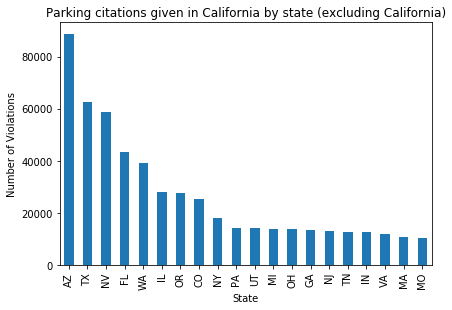

In [27]:
no_ca_chart = df2['RP State Plate'].value_counts()[:20].plot.bar()
plt.tight_layout()
no_ca_chart.set_xlabel("State")
no_ca_chart.set_ylabel("Number of Violations")
no_ca_chart.set_title("Parking citations given in California by state (excluding California)")

In [28]:
fig = no_ca_chart.get_figure()
fig.savefig('no_ca.jpg')

In [62]:
fine_sort = tickets.find({},{"Ticket number":1, "Violation Description":1, "Fine amount":1}).sort("Fine amount", -1).limit(100)

In [63]:
df3 = pd.io.json.json_normalize(fine_sort)

In [65]:
df3.head(10)

,_id,Ticket number,Violation Description,Fine amount
0,5ecbeda3a1360440c4710b31,4357748430,PK OVERSIZ,98.0
1,5ecbeda5a1360440c47162c5,4357851842,PK OVERSIZ,98.0
2,5ecbeda6a1360440c4717e36,4359460033,PK OVERSIZ,98.0
3,5ecbeda6a1360440c471821f,4360048254,PK OVERSIZ,98.0
4,5ecbeda6a1360440c4718224,4360048265,PK OVERSIZ,98.0
5,5ecbeda9a1360440c472075b,4359446453,PK OVERSIZ,98.0
6,5ecbedaaa1360440c47212c2,4359346530,PK OVERSIZ,98.0
7,5ecbedb3a1360440c4736e12,4504035281,PK OVERSIZ,98.0
8,5ecbedb3a1360440c47371d2,4504283582,PK OVERSIZ,98.0
9,5ecbea0da1360440c4dd8723,4274078911,PK OVERSIZ,98


In [66]:
type(fine_sort)

pymongo.cursor.Cursor